# Predicting car prices in Kenya with data collected from Jiji.co.ke

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1= pd.read_csv('general_car_data.csv')
df1.head()

C:\Users\Brian\AppData\Local\Temp\ipykernel_11236\3609153498.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df1= pd.read_csv('general_car_data.csv')


,Unnamed: 0,Condition,Make,Body,Fuel,Second Condition,Registered Car,Model,Exchange Possible,Seats,...,region_name,count_images,count_views,id_y,description,boost,min_est,max_est,paid_infor,avg_est
0,0,Kenyan Used,Toyota,NaN,NaN,"['Original parts', 'Unpainted', 'No faults']",Yes,Crown,['No'],NaN,...,Kilimani,5.0,125.0,10593924.0,Alloy wheels Fog lights Steering controls beig...,40X Diamond,1400000.0,1450000.0,Sponsored,1425000.0
1,1,Foreign Used,Mazda,NaN,NaN,['No faults'],NaN,CX-5,NaN,NaN,...,Kilimani,8.0,36.0,10717151.0,"Mazda CX-5, petrol, 2016, 2000cc, white in col...",VIP TOP+,2500000.0,2650000.0,Sponsored,2575000.0
2,2,Foreign Used,Mazda,NaN,NaN,['No faults'],Yes,Demio,NaN,NaN,...,Ridgeways,6.0,314.0,10417467.0,"2015 Mazda demio diesel,alloy rims, steering c...",VIP TOP+,1080000.0,1100000.0,Sponsored,1090000.0
3,3,Kenyan Used,Mazda,NaN,NaN,"['No faults', 'Original parts']",Yes,CX-5,NaN,NaN,...,Langata,9.0,87.0,10754171.0,"2200cc Diesel,\nSkyactive,\ncruise control,\nI...",VIP TOP+,NaN,NaN,Sponsored,NaN
4,4,Foreign Used,Peugeot,NaN,NaN,['No faults'],No,508,['Yes'],NaN,...,Nairobi Central,17.0,2344.0,7115429.0,Peugeot 508 \n\n2014 Model | 1600cc petrol eng...,5X Diamond,NaN,NaN,Sponsored,NaN


In [3]:
df1.columns

Index(['Unnamed: 0', 'Condition', 'Make', 'Body', 'Fuel', 'Second Condition',
       'Registered Car', 'Model', 'Exchange Possible', 'Seats',
       'Year of Manufacture', 'Color', 'Transmission', 'Mileage',
       'price_valuation_txt', 'price_estimate', 'selling_price', 'advert_id',
       'id_x', 'name', 'date_created_x', 'phone', 'page_url', 'adverts_count',
       'status', 'date_created_y', 'date_moderated', 'date_edited',
       'paid_info', 'region_name', 'count_images', 'count_views', 'id_y',
       'description', 'boost', 'min_est', 'max_est', 'paid_infor', 'avg_est'],
      dtype='object')

In [18]:
# Creat a new column called Age:
df1['Age']= df1['Year of Manufacture'].apply(lambda x: (2022-int(x)) if pd.notna(x)  else x)

### Select features that can be used in training

In [19]:
selected_cols= ['Condition', 'Make','Model','Age','Transmission','Mileage', 'selling_price', 'Color','Registered Car','region_name']

In [20]:
df2= df1[selected_cols]
df2.head(5)

,Condition,Make,Model,Age,Transmission,Mileage,selling_price,Color,Registered Car,region_name
0,Kenyan Used,Toyota,Crown,10.0,Automatic,NaN,1270000.0,White,Yes,Kilimani
1,Foreign Used,Mazda,CX-5,6.0,Automatic,74000.0,2750000.0,White,NaN,Kilimani
2,Foreign Used,Mazda,Demio,7.0,Automatic,117000.0,1090000.0,Silver,Yes,Ridgeways
3,Kenyan Used,Mazda,CX-5,9.0,AMT,92929.0,1720000.0,Black,Yes,Langata
4,Foreign Used,Peugeot,508,8.0,Automatic,91000.0,1999000.0,Black,No,Nairobi Central


### Clean data & Drop nulls

In [21]:
df2.isnull().sum()

Condition          109
Make               109
Model              109
Age                109
Transmission        19
Mileage           5349
selling_price       18
Color               22
Registered Car    2482
region_name         18
dtype: int64

In [29]:
# For this drop all the nulls - We can modify this later to avoud dropping nulls but substitute.
df3 = df2.dropna()

In [30]:
df3.head()

,Condition,Make,Model,Age,Transmission,Mileage,selling_price,Color,Registered Car,region_name
2,Foreign Used,Mazda,Demio,7.0,Automatic,117000.0,1090000.0,Silver,Yes,Ridgeways
3,Kenyan Used,Mazda,CX-5,9.0,AMT,92929.0,1720000.0,Black,Yes,Langata
4,Foreign Used,Peugeot,508,8.0,Automatic,91000.0,1999000.0,Black,No,Nairobi Central
8,Kenyan Used,Honda,Fit,8.0,Automatic,117000.0,1050000.0,Silver,Yes,Nairobi Central
10,Foreign Used,Nissan,X-Trail,7.0,Automatic,87000.0,2500000.0,Black,Yes,Kilimani


## Feature Engineering

#### New feature, mileage/year

In [65]:
df4= df3.copy()

In [66]:
def get_mpy(mil, age):
    if age>0:
        return mil/age
    else:
        return mil

In [71]:
df4['mpy'] = df4.apply(lambda x: get_mpy(x.Mileage, x.Age), axis=1)
df4.head()


,Condition,Make,Model,Age,Transmission,Mileage,selling_price,Color,Registered Car,region_name,mpy
2,Foreign Used,Mazda,Demio,7.0,Automatic,117000.0,1090000.0,Silver,Yes,Ridgeways,16714.285714
3,Kenyan Used,Mazda,CX-5,9.0,AMT,92929.0,1720000.0,Black,Yes,Langata,10325.444444
4,Foreign Used,Peugeot,508,8.0,Automatic,91000.0,1999000.0,Black,No,Nairobi Central,11375.000000
8,Kenyan Used,Honda,Fit,8.0,Automatic,117000.0,1050000.0,Silver,Yes,Nairobi Central,14625.000000
10,Foreign Used,Nissan,X-Trail,7.0,Automatic,87000.0,2500000.0,Black,Yes,Kilimani,12428.571429


## Dimensionality reduction

### Explore cat variables for dimension reduction

In [72]:
df5 = df4.copy()

In [73]:
(df5.Model.value_counts()>10).sum()

130

#### For the categorical variables: Make, Model, Color, & Region name, pick only those above 10 counts, create Other for the rest

In [74]:
# Function to create  a new feature category for counts less than 10
def create_other(df, feature):
    stats = df[feature].value_counts(ascending=False)
    stats_less_than_10 = stats[stats<=10]
    stats_less_than_10
    df[feature] = df[feature].apply(lambda x: 'other' if x in stats_less_than_10 else x)
    

In [75]:
# df5.columns
features = ['Make', 'Model','Color','region_name']

In [76]:
for feat in features:
    create_other(df5, feat)

# Outlier Removal

### Outlier removal using standard deviation & Mean

In [77]:
df6 = df5.copy()

In [78]:
df6.describe()

,Age,Mileage,selling_price,mpy
count,11187.000000,1.118700e+04,1.118700e+04,11187.000000
mean,8.551086,8.928362e+04,2.309831e+06,10588.219238
std,3.094748,7.009986e+04,2.154064e+06,7627.198949
min,0.000000,0.000000e+00,7.000000e+04,0.000000
25%,7.000000,6.000000e+04,1.100000e+06,7812.500000
50%,8.000000,8.000000e+04,1.699000e+06,9750.000000
75%,8.000000,1.020000e+05,2.650000e+06,12107.062500
max,64.000000,1.980000e+06,4.500000e+07,177142.857143


In [80]:
df6.shape

(11187, 11)

In [87]:
models= df6.groupby('Model')

In [99]:
# models.agg(Mean = ('selling_price', np.mean), Std= ('selling_price', np.std) )

In [100]:
# for key, subdf in models:
#     print(subdf.selling_price)

In [108]:
def remove_pps_outliers(df, feature):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Model'):
        m = np.mean(subdf[feature])
        st = np.std(subdf[feature])
        reduced_df = subdf[(subdf[feature]>(m-st)) & (subdf[feature]<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [109]:
df7 = remove_pps_outliers(df6, 'selling_price')
df7.shape

(9811, 11)

In [110]:
df8 = remove_pps_outliers(df7, 'mpy')
df8.shape

(8015, 11)

In [114]:
df9 = remove_pps_outliers(df8, 'Age')
df9.shape

(6415, 11)

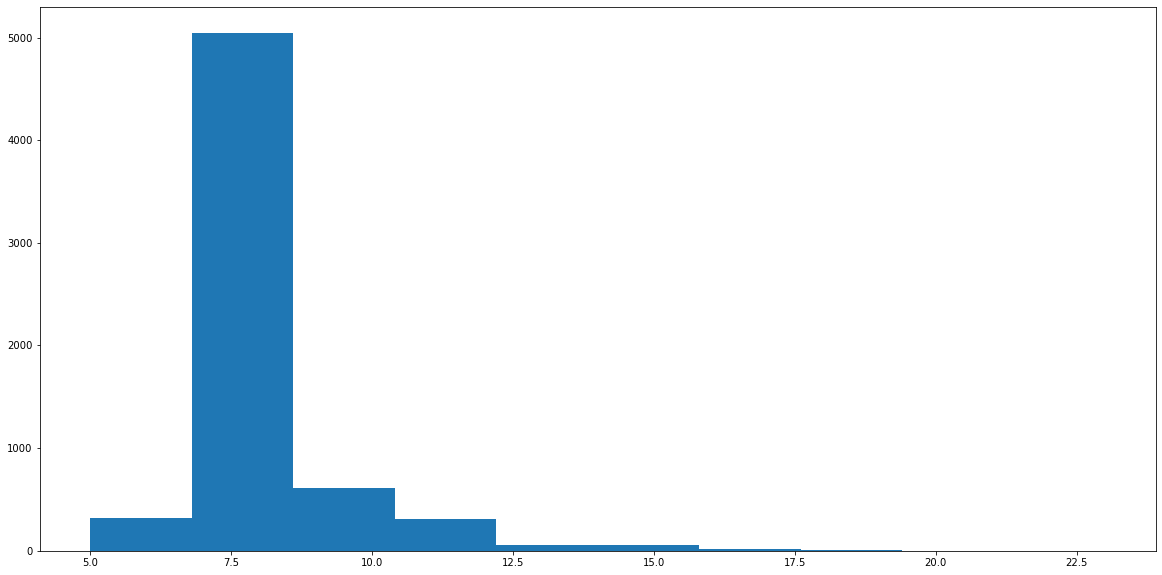

In [115]:
plt.hist(df9.Age)
plt.show()

In [116]:
df8.head()

,Condition,Make,Model,Age,Transmission,Mileage,selling_price,Color,Registered Car,region_name,mpy
0,Kenyan Used,BMW,116i,14.0,Automatic,164400.0,950000.0,Silver,Yes,Nairobi Central,11742.857143
1,Foreign Used,BMW,116i,6.0,Automatic,62000.0,3100000.0,White,Yes,Kilimani,10333.333333
2,Foreign Used,BMW,116i,8.0,Automatic,72000.0,940000.0,Orange,No,Mombasa CBD,9000.000000
3,Foreign Used,BMW,116i,7.0,Automatic,58000.0,1670000.0,Red,Yes,Mombasa CBD,8285.714286
4,Foreign Used,BMW,116i,7.0,Automatic,64000.0,980000.0,White,No,Mombasa CBD,9142.857143


# Drop columns to not use in Training

In [141]:
#drop mpy:
cols_to_drop= ['mpy', 'region_name']
df9 = df8.drop(cols_to_drop, axis=1)

## One hot encoding

In [142]:
# Fields to encode:
cat_features = ['Condition', 'Make', 'Model', 'Transmission','Color', 'Registered Car']

In [143]:
dummies = pd.get_dummies(df9, columns=cat_features,  drop_first=True)

In [144]:
df10 = dummies.copy()

In [145]:
df10.shape

(8015, 179)

# Building a Model

In [146]:
X = df10.drop('selling_price', axis=1)

In [147]:
X.head()

,Age,Mileage,Condition_Foreign Used,Condition_Kenyan Used,Make_BMW,Make_Citroen,Make_Daihatsu,Make_Ford,Make_Honda,Make_Isuzu,...,Color_Other,Color_Pearl,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Teal,Color_White,Color_Yellow,Registered Car_Yes
0,14.0,164400.0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,6.0,62000.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,8.0,72000.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,58000.0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,7.0,64000.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [148]:
y = df10.selling_price
y.shape

(8015,)

### Split training & test data

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

### Linear Model

In [150]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

-0.035323011544098115

In [151]:
lr_pred = lr_clf.predict(X_test)

In [152]:
from sklearn.metrics import r2_score
r2_score(y_test, lr_pred)

-0.035323011544098115

### Using k fold cross validation to measure accuracy of the linear model

In [153]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([-0.02153065,  0.00504552, -0.01895611, -0.02227095, -0.01951642])

### Find best model using GridSearchCV

In [154]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Brian\anaconda3\envs\py3-TF\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Brian\anaconda3\envs\py3-TF\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline impor

C:\Users\Brian\anaconda3\envs\py3-TF\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.602e+15, tolerance: 5.381e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Brian\anaconda3\envs\py3-TF\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.583e+15, tolerance: 5.376e+11
  model = cd_fast.enet_coordinate_descent(
C:\Users\Brian\anaconda3\envs\py3-TF\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

,model,best_score,best_params
0,linear_regression,-0.015446,{'normalize': True}
1,lasso,-0.015099,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,-0.843218,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


### Random Forest regressor

In [155]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_reg.fit(X_train, y_train) 
rf_reg.score(X_test,y_test)

-0.28280362433100725

### Decision Tree regressor

In [167]:
from sklearn.tree import DecisionTreeRegressor 
# create a regressor object
dt_reg = DecisionTreeRegressor(random_state = 0)   
# fit the regressor with X and Y data
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [168]:
dt_pred = dt_reg.predict(X_test)
get_score(rf_pred, y_test)

58.99661023043001

## Defining my own scores

In [162]:
# The average pecentage difference between the predicted and teh test variables
def get_score(pred, test):
    df_r = pd.DataFrame({'pred':pred,'test':test})
    df_r['error'] = abs((df_r['pred']-df_r['test'])/df_r['test'])*100
    return df_r.error.mean()

In [163]:
rf_pred = rf_reg.predict(X_test)
get_score(rf_pred, y_test)

58.99661023043001

In [164]:
get_score(lr_pred, y_test)

55.43638700109826